## 단어 벡터화 하기

<img src="https://i.imgur.com/hii5VdV.png" width="600" align="left">

* https://scikit-learn.org/stable/modules/feature_extraction.html

## 라이브러리 로드

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 한글폰트 설정

In [4]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn")
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

## 분석할 문서

In [5]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
         ]

In [6]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

## Bag of Words


* BOW(bag of words)
    * 가장 간단하지만 효과적이라 널리쓰이는 방법
    * 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤아립니다.
    * 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(bag)으로 생각할 수 있습니다.
    * BOW는 단어의 순서가 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 합니다.
        - `it's bad, not good at all.` 
        - `it's good, not bad at all.` 
    * 위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환됩니다.
    * 이를 보완하기 위해 n-gram을 사용하는 데 BOW는 하나의 토큰을 사용하지만 n-gram은 n개의 토큰을 사용할 수 있도록 합니다.
    * min_df는 문서에 특정 단어가 최소 몇 번 이상 문서에 등장하는 단어를 가방에 담겠다는 의미입니다.

* [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)


### CountVectorizer
* CountVectorizer 는 사이킷런에서 제공하는 bag of words 를 만들 수 있는 방법입니다.
* 텍스트 문서 모음을 토큰 수의 행렬로 변환합니다.

* 단어들의 카운트(출현 빈도)로 여러 문서들을 벡터화
* 문서목록에서 각 문서의 feature(문장의 특징) 노출수를 가중치로 설정한 BOW 벡터를 생성
* 카운트 행렬, 단어 문서 행렬 (Term-Document Matrix, TDM))
* max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있음 
* 토큰의 빈도가 max_df로 지정한 값을 초과 하거나 min_df로 지정한 값보다 작은 경우에는 무시하며 인자 값은 정수인 경우 횟수, 부동소수점인 경우 비율을 의미
* API documentation:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### 사용법
1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다.
4. 매개 변수
    * analyzer : 단어, 문자 단위의 벡터화 방법 정의
    * ngram_range : BOW 단위 수 (1, 3) 이라면 1개~3개까지 토큰을 묶어서 벡터화
    * max_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 높은 용어(말뭉치 관련 불용어)는 제외 (기본값=1.0)
        * max_df = 0.90 : 문서의 90% 이상에 나타나는 단어 제외
        * max_df = 10 : 10개 이상의 문서에 나타나는 단어 제외
    * min_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 낮은 용어는 제외합니다. 컷오프라고도 합니다.(기본값=1.0)
        * min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 제외
        * min_df = 10 : 문서에 10개 미만으로 나타나는 단어 제외
    * stop_words : 불용어 정의

In [9]:
# sklearn.feature_extraction.text의 CountVectorizer 를 통해 BOW 를 생성
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()

### fit, transform, fit_transfrom의 차이점
* fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 배웁니다.
* transform(): 문서를 문서 용어 매트릭스로 변환합니다. transform 이후엔 매트릭스로 변환되어 숫자형태로 변경됩니다.
* fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환합니다. fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현됩니다.

⚠️ 주의! ⚠️
* 단, fit_transform 은 학습데이터에만 사용하고 예측 데이터에는 transform 을 사용합니다.
* 예측 데이터에도 fit_transform 을 사용하게 된다면 서로 다른 단어사전으로 행렬을 만들게 됩니다.
* fit 과 transform 을 따로 사용해 준다 하더라도 fit 은 학습 데이터에만 사용합니다. 같은 단어 사전으로 예측 데이터셋의 단어 사전을 만들기 위해서 입니다.

In [13]:
# 문장에서 노출되는 feature(특징이 될만한 단어) 수를 합한 Document Term Matrix(이하 dtm) 을 반환합니다.
# fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 배웁니다.
# transform(): 문서를 단어 빈도수가 들어있는 문서 용어 매트릭스로 변환합니다. 
# cvect
# dtm
cvect.fit(corpus)
dtm = cvect.transform(corpus)
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [14]:
# fit_transform() 어휘 사전을 배우고 문서 용어 매트릭스를 반환합니다. 
# fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현됩니다.
# dtm
dtm = cvect.fit_transform(corpus)
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [15]:
print(cvect.get_feature_names())

['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다', '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널']


In [16]:
# get_feature_names is deprecated in 1.0 and will be removed in 1.2
# 1.2 버전에서 제외될 예정으로 get_feature_names_out()을 사용합니다.
cvect.get_feature_names_out()

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [18]:
# get_feature_names_out 로 단어 사전 보기
# vocab 
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [26]:
# 단어사전을 봅니다. 
# 단어사전은 {"단어": 인덱스번호} 로 되어 있습니다.
cvect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

In [28]:
# document-term matrix 를 데이터프레임으로 만듭니다.
# df_dtm
df_dtm = pd.DataFrame(pd.Series(cvect.vocabulary_)).transpose()
df_dtm

,코로나,거리두기와,상생지원금,문의입니다,지하철,운행시간과,요금,승강장,선별진료소,버스,운행시간,터미널,위치,안내입니다,거리두기,택시
0,13,1,4,2,12,10,8,6,5,3,9,15,11,7,0,14


In [30]:
dtm.toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [32]:
df_dtm = pd.DataFrame(dtm.toarray(),columns=vocab)
df_dtm

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [36]:
# 전체 문서에서 단어 빈도의 합계를 구합니다.
df_dtm.sum().to_frame().T

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,1,1,6,2,1,1,2,2,1,1,1,1,3,4,1,1


In [47]:
df_dtm.replace(0,np.nan).notnull().sum().to_frame().T

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,1,1,6,2,1,1,2,2,1,1,1,1,2,3,1,1


In [48]:
# corpus 와 document-term matrix 를 비교해 봅니다.
df_dtm.sum().to_frame().T

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,1,1,6,2,1,1,2,2,1,1,1,1,3,4,1,1


In [49]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

### N-grams 

* 토큰을 몇 개 사용할 것인지를 구분합니다. 지정한 n개의 숫자 만큼의 토큰을 묶어서 사용합니다.
* 예를 들어 (1, 1) 이라면 1개의 토큰을 (2, 3)이라면 2~3개의 토큰을 사용합니다.
* analyzer 설정에 따라 단어단위, 캐릭터 단위에 따라 사용할 수 있습니다.

* 기본값 = (1, 1)
* ngram_range(min_n, max_n)
* min_n <= n <= max_n
```
(1, 1) 은 1 <= n <= 1
(1, 2) 은 1 <= n <= 2
(2, 2) 은 2 <= n <= 2
```

In [57]:
# 단어가 너무 많아서 출력이 오래 걸린다면 max_columns 값을 조정해서 사용합니다.
pd.options.display.max_columns = None

In [64]:
# ngram_range: 추출할 다른 단어 n-gram 또는 char n-gram에 대한 n-값 범위의 하한 및 상한입니다. 기본값 = (1, 1)
cvect = CountVectorizer(ngram_range=(1,2))
dtm = cvect.fit_transform(corpus)
dtm

<8x36 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [65]:
df_dtm = pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out())
df_dtm

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [78]:
# df_dtm.sum 으로 빈도수 합계 구하기
df_dtm.sum().to_frame().T

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,1,1,1,1,6,2,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,3,1,1,1,4,1,1,1,1,1,1,1,1


In [81]:
df_dtm.replace(0,np.nan).notnull().sum().to_frame().T

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,1,1,1,1,6,2,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1


In [73]:
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기', '거리두기 안내입니다', '거리두기와', '거리두기와 코로나', '문의입니다', '버스',
       '버스 운행시간', '버스 터미널', '상생지원금', '상생지원금 문의입니다', '선별진료소',
       '선별진료소 문의입니다', '승강장', '승강장 문의입니다', '안내입니다', '요금', '요금 문의입니다',
       '운행시간', '운행시간 문의입니다', '운행시간과', '운행시간과 지하철', '위치', '위치 안내입니다',
       '지하철', '지하철 승강장', '지하철 요금', '지하철 운행시간과', '코로나', '코로나 거리두기',
       '코로나 거리두기와', '코로나 상생지원금', '코로나 선별진료소', '택시', '택시 승강장', '터미널',
       '터미널 위치'], dtype=object)

In [77]:
print('vocab counts :',len(vocab))
df_dtm.style.background_gradient()

vocab counts : 36


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [93]:
# 모델을 받아 변환을 하고 문서 용어 행렬을 반환하는 함수를 만들어 재사용합니다.
def display_transform_dtm(cvect, corpus):
    """
    모델을 받아 변환을 하고 문서 용어 행렬을 반환하는 함수
    """
    dtm = cvect.fit_transform(corpus)
    vocab = cvect.get_feature_names_out()
    print(f'단어 수 : {len(vocab)}')
    print(vocab)
    display(pd.DataFrame(dtm.toarray(), columns=vocab).style.background_gradient())
    return dtm

In [94]:
# display_transform_dtm  함수가 잘 만들어졌는지 확인합니다.
display_transform_dtm(CountVectorizer(ngram_range = (1,2)), corpus)

단어 수 : 36
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '문의입니다' '버스' '버스 운행시간' '버스 터미널'
 '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다'
 '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '위치' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나' '코로나 거리두기' '코로나 거리두기와'
 '코로나 상생지원금' '코로나 선별진료소' '택시' '택시 승강장' '터미널' '터미널 위치']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


<8x36 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [ ]:
# ngram_range=(2, 3)
# display_transform_dtm 으로 확인합니다.
# cvect


### min_df

* 기본값=1
* min_df는 문서 빈도(문서의 %에 있음)가 지정된 임계값보다 엄격하게 낮은 용어를 무시합니다. 
* 예를 들어, min_df=0.66은 용어가 어휘의 일부로 간주되려면 문서의 66%에 나타나야 합니다.
* 때때로 min_df가 어휘 크기를 제한하는 데 사용됩니다.
* 예를들어 min_df를 0.1, 0.2로 설정한다면 10%, 20%에 나타나는 용어만 학습합니다.

In [95]:
# min_df=0.1
# display_transform_dtm 으로 확인합니다.

cvect = CountVectorizer(min_df = 0.2, ngram_range=(1,2))
display_transform_dtm(cvect, corpus)

단어 수 : 7
['문의입니다' '버스' '승강장' '승강장 문의입니다' '안내입니다' '지하철' '코로나']


,문의입니다,버스,승강장,승강장 문의입니다,안내입니다,지하철,코로나
0,1,0,0,0,0,0,2
1,1,0,0,0,0,2,0
2,1,0,1,1,0,1,0
3,1,0,0,0,0,0,1
4,1,1,0,0,0,0,0
5,0,1,0,0,1,0,0
6,0,0,0,0,1,0,1
7,1,0,1,1,0,0,0


<8x7 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

### max_df

* 기본값=**1**
* max_df=int : 빈도수를 의미
* max_df=float : 비율을 의미
* 어휘를 작성할 때 주어진 임계값보다 문서 빈도가 엄격히 높은 용어는 무시
* 빈번하게 등장하는 불용어 등을 제거하기에 좋음
* 예를 들어 코로나 관련 기사를 분석하면 90%에 '코로나'라는 용어가 등장할 수 있는데, 이 경우 max_df=0.89 로 비율을 설정하여 너무 빈번하게 등장하는 단어를 제외할 수 있음

In [97]:
# max_df=int : 빈도수를 의미
# max_df=float : 비율을 의미
# display_transform_dtm 으로 확인합니다.

cvect = CountVectorizer(min_df=.2, max_df=.6, ngram_range=(1,4))
display_transform_dtm(cvect, corpus)

단어 수 : 6
['버스' '승강장' '승강장 문의입니다' '안내입니다' '지하철' '코로나']


,버스,승강장,승강장 문의입니다,안내입니다,지하철,코로나
0,0,0,0,0,0,2
1,0,0,0,0,2,0
2,0,1,1,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,1,0,0,1,0,0
6,0,0,0,1,0,1
7,0,1,1,0,0,0


<8x6 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

### max_features

* 기본값 = None
* 벡터라이저가 학습할 기능(어휘)의 양 제한
* corpus중 빈도수가 가장 높은 순으로 해당 갯수만큼만 추출

In [98]:
# max_features 갯수만큼의 단어만 추출하기
# display_transform_dtm 으로 확인합니다.

cvect = CountVectorizer(min_df=.01, max_df=.8, ngram_range=(1,4), max_features=50)
display_transform_dtm(cvect, corpus)

단어 수 : 50
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '거리두기와 코로나 상생지원금'
 '거리두기와 코로나 상생지원금 문의입니다' '문의입니다' '버스' '버스 운행시간' '버스 운행시간 문의입니다' '버스 터미널'
 '버스 터미널 위치' '버스 터미널 위치 안내입니다' '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다'
 '승강장' '승강장 문의입니다' '안내입니다' '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과'
 '운행시간과 지하철 요금' '운행시간과 지하철 요금 문의입니다' '위치 안내입니다' '지하철' '지하철 승강장'
 '지하철 승강장 문의입니다' '지하철 요금' '지하철 요금 문의입니다' '지하철 운행시간과' '지하철 운행시간과 지하철'
 '지하철 운행시간과 지하철 요금' '코로나' '코로나 거리두기' '코로나 거리두기 안내입니다' '코로나 거리두기와'
 '코로나 거리두기와 코로나' '코로나 거리두기와 코로나 상생지원금' '코로나 상생지원금' '코로나 상생지원금 문의입니다'
 '코로나 선별진료소' '코로나 선별진료소 문의입니다' '택시' '택시 승강장' '택시 승강장 문의입니다' '터미널']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,거리두기와 코로나 상생지원금 문의입니다,문의입니다,버스,버스 운행시간,버스 운행시간 문의입니다,버스 터미널,버스 터미널 위치,버스 터미널 위치 안내입니다,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철 요금,운행시간과 지하철 요금 문의입니다,위치 안내입니다,지하철,지하철 승강장,지하철 승강장 문의입니다,지하철 요금,지하철 요금 문의입니다,지하철 운행시간과,지하철 운행시간과 지하철,지하철 운행시간과 지하철 요금,코로나,코로나 거리두기,코로나 거리두기 안내입니다,코로나 거리두기와,코로나 거리두기와 코로나,코로나 거리두기와 코로나 상생지원금,코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소,코로나 선별진료소 문의입니다,택시,택시 승강장,택시 승강장 문의입니다,터미널
0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,2,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


<8x50 sparse matrix of type '<class 'numpy.int64'>'
	with 62 stored elements in Compressed Sparse Row format>

### 불용어 stop_words

* 문장에 자주 등장하지만 "우리, 그, 그리고, 그래서" 등 관사, 전치사, 조사, 접속사 등의 단어로 문장 내에서 큰 의미를 갖지 않는 단어

In [100]:
stop_words=["코로나", "문의입니다"]
# max_features 갯수만큼의 단어만 추출하기

cvect = CountVectorizer(stop_words = stop_words, min_df=.01, max_df=.9, ngram_range=(1,7), max_features=50)
display_transform_dtm(cvect, corpus)

단어 수 : 31
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 상생지원금' '버스' '버스 운행시간' '버스 터미널'
 '버스 터미널 위치' '버스 터미널 위치 안내입니다' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간'
 '운행시간과' '운행시간과 지하철' '운행시간과 지하철 요금' '위치' '위치 안내입니다' '지하철' '지하철 승강장'
 '지하철 요금' '지하철 운행시간과' '지하철 운행시간과 지하철' '지하철 운행시간과 지하철 요금' '택시' '택시 승강장'
 '터미널' '터미널 위치' '터미널 위치 안내입니다']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 상생지원금,버스,버스 운행시간,버스 터미널,버스 터미널 위치,버스 터미널 위치 안내입니다,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,지하철 운행시간과 지하철 요금,택시,택시 승강장,터미널,터미널 위치,터미널 위치 안내입니다
0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,2,0,1,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


<8x31 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

### analyzer

* 기본값='word'
* 종류: word, char, char_wb
* 기능을 단어 n-그램으로 만들지 문자 n-그램으로 만들어야 하는지 여부입니다. 옵션 'char_wb'는 단어 경계 내부의 텍스트에서만 문자 n-gram을 생성합니다. 단어 가장자리의 n-gram은 공백으로 채워집니다.
* 띄어쓰기가 제대로 되어 있지 않은 문자 등에 사용할 수 있습니다.

In [101]:
# analyzer='char_wb

cvect = CountVectorizer(min_df=0.01, max_df=.9, ngram_range=(2,3),
                        max_features=50, stop_words = stop_words, analyzer = 'char_wb')
display_transform_dtm(cvect, corpus)

단어 수 : 50
[' 거' ' 거리' ' 문' ' 문의' ' 버' ' 버스' ' 승' ' 승강' ' 안' ' 안내' ' 운' ' 운행' ' 지'
 ' 지하' ' 코' ' 코로' '강장' '강장 ' '나 ' '내입' '내입니' '두기' '로나' '로나 ' '리두' '리두기'
 '문의' '문의입' '버스' '버스 ' '스 ' '승강' '승강장' '시간' '안내' '안내입' '운행' '운행시' '의입'
 '의입니' '장 ' '지하' '지하철' '철 ' '코로' '코로나' '하철' '하철 ' '행시' '행시간']


,거,거리,문,문의,버,버스,승,승강,안,안내,운,운행,지,지하,코,코로,강장,강장,나,내입,내입니,두기,로나,로나,리두,리두기,문의,문의입,버스,버스,스,승강,승강장,시간,안내,안내입,운행,운행시,의입,의입니,장,지하,지하철,철,코로,코로나,하철,하철,행시,행시간
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,0,0,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,2,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,2,2,2,0,0,2,2,1,1
2,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1
5,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


<8x50 sparse matrix of type '<class 'numpy.int64'>'
	with 131 stored elements in Compressed Sparse Row format>

In [102]:
# analyzer='char', ngram_range=(2, 3)

cvect = CountVectorizer(min_df=0.01, max_df=.9, ngram_range=(1,7),
                        max_features=50, stop_words = stop_words, analyzer = 'char')
display_transform_dtm(cvect, corpus)

단어 수 : 50
[' 문' ' 문의' ' 문의입' ' 문의입니' ' 문의입니다' ' 문의입니다.' '나' '나 ' '나 거' '나 거리'
 '나 거리두' '나 거리두기' '내' '내입' '내입니' '내입니다' '내입니다.' '로' '로나' '로나 ' '문' '문의'
 '문의입' '문의입니' '문의입니다' '문의입니다.' '버스' '스 ' '승강' '승강장' '승강장 ' '시' '의' '의입'
 '의입니' '의입니다' '의입니다.' '지' '지하' '지하철' '지하철 ' '철' '철 ' '코' '코로' '코로나' '코로나 '
 '하' '하철' '하철 ']


,문,문의,문의입,문의입니,문의입니다,문의입니다.,나,나,나 거,나 거리,나 거리두,나 거리두기,내,내입,내입니,내입니다,내입니다.,로,로나,로나,문,문의,문의입,문의입니,문의입니다,문의입니다.,버스,스,승강,승강장,승강장,시,의,의입,의입니,의입니다,의입니다.,지,지하,지하철,지하철,철,철,코,코로,코로나,코로나,하,하철,하철
0,1,1,1,1,1,1,2,2,1,1,1,1,0,0,0,0,0,2,2,2,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,2,2,2,2,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,0,0,0,0,2,2,2
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1
3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0
4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
7,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<8x50 sparse matrix of type '<class 'numpy.int64'>'
	with 179 stored elements in Compressed Sparse Row format>

## TF-IDF
TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것을 DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다. TF-IDF는 TF와 IDF를 곱한 값이다.

IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.

역문서 빈도(IDF)는 한 단어가 문서 집합 전체에서 얼마나 공통적으로 나타나는지를 나타내는 값이다. 전체 문서의 수를 해당 단어를 포함한 문서의 수로 나눈 뒤 로그를 취하여 얻을 수 있다.

* 출처 : [TF-IDF - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/TF-IDF)

\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}


### TfidfVectorizer
* 문서 모음을 TF-IDF 기능의 매트릭스로 변환합니다.
* tf-idf를 사용하는 목표는 주어진 말뭉치에서 매우 자주 발생하고 따라서 훈련 말뭉치의 작은 부분에서 발생하는 특징보다 경험적으로 덜 유용한 토큰의 영향을 축소하는 것입니다.
* API documentation : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


* TfidfVectorizer 는 사이킷런에서 TF-IDF 가중치를 적용한 단어 벡터를 만들 수 있는 방법입니다.
    * norm='l2' 각 문서의 피처 벡터 정규화 방법
        - L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값
        - L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절
    * smooth_idf=False
        - 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
    * sublinear_tf=False
    * use_idf=True
        - TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부


In [109]:
# sklearn.feature_extraction.text 에서 TfidfVectorizer 를 불러옵니다.
# fit, transform 으로 변환을 합니다.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
display_transform_dtm(tfidfvect, corpus)

단어 수 : 16
['거리두기' '거리두기와' '문의입니다' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간'
 '운행시간과' '위치' '지하철' '코로나' '택시' '터미널']


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.000000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.751070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.000000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('count',CountVectorizer()),
                ('tfid',TfidfTransformer())]).fit(corpus)

pipe['count'].transform(corpus).toarray()

pipe['tfid'].idf_

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [124]:
# fit_transform 으로 변환할 수도 있습니다.
tfidfvect = TfidfVectorizer()
dtm = tfidfvect.fit_transform(corpus)
dtm

<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [125]:
# dtm.toarray() 로 배열을 확인합니다.
# 문서에 토큰이 더 많이 나타날수록 가중치는 더 커집니다. 
# 그러나 토큰이 문서에 많이 표시될수록 가중치가 감소합니다.
dtm.toarray()

array([[0.        , 0.47991911, 0.23982075, 0.        , 0.47991911,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.69414789, 0.        ,
        0.        ],
       [0.        , 0.        , 0.22216587, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44458893, 0.        ,
        0.44458893, 0.        , 0.74520044, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38849954, 0.        , 0.        ,
        0.        , 0.65156278, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.65156278, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37531751, 0.        , 0.        ,
        0.7510695 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5431679 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35765909, 0.59983945, 0.        ,
        0.        , 0.        , 

In [126]:
# display_transform_dtm 으로 변환 결과를 확인합니다.
display_transform_dtm(tfidfvect, corpus)

단어 수 : 16
['거리두기' '거리두기와' '문의입니다' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간'
 '운행시간과' '위치' '지하철' '코로나' '택시' '터미널']


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.000000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.751070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.000000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

### IDF

**IDF**

- IDF 값은 문서군의 성격에 따라 결정된다. 예를 들어 '원자'라는 낱말은 일반적인 문서들 사이에서는 잘 나오지 않기 때문에 IDF 값이 높아지고 문서의 핵심어가 될 수 있지만, 원자에 대한 문서를 모아놓은 문서군의 경우 이 낱말은 상투어가 되어 각 문서들을 세분화하여 구분할 수 있는 다른 낱말들이 높은 가중치를 얻게 된다.

In [116]:
# 하나의 문서에만 나타나는 토큰은 idf 가중치가 높습니다.
# 적게 나타난 토큰이라도 모든 문서에도 있는 토큰은 idf가 낮습니다.
idf = tfidfvect.idf_
idf

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [120]:
# 사전만들기
# dict, zip 을 사용하여 피처명과 idf 값을 딕셔너리 형태로 만듭니다.
vocab = tfidfvect.get_feature_names_out()
idf_dict = dict(zip(vocab,idf))
idf_dict

{'거리두기': 2.504077396776274,
 '거리두기와': 2.504077396776274,
 '문의입니다': 1.251314428280906,
 '버스': 2.09861228866811,
 '상생지원금': 2.504077396776274,
 '선별진료소': 2.504077396776274,
 '승강장': 2.09861228866811,
 '안내입니다': 2.09861228866811,
 '요금': 2.504077396776274,
 '운행시간': 2.504077396776274,
 '운행시간과': 2.504077396776274,
 '위치': 2.504077396776274,
 '지하철': 2.09861228866811,
 '코로나': 1.8109302162163288,
 '택시': 2.504077396776274,
 '터미널': 2.504077396776274}

<AxesSubplot:>

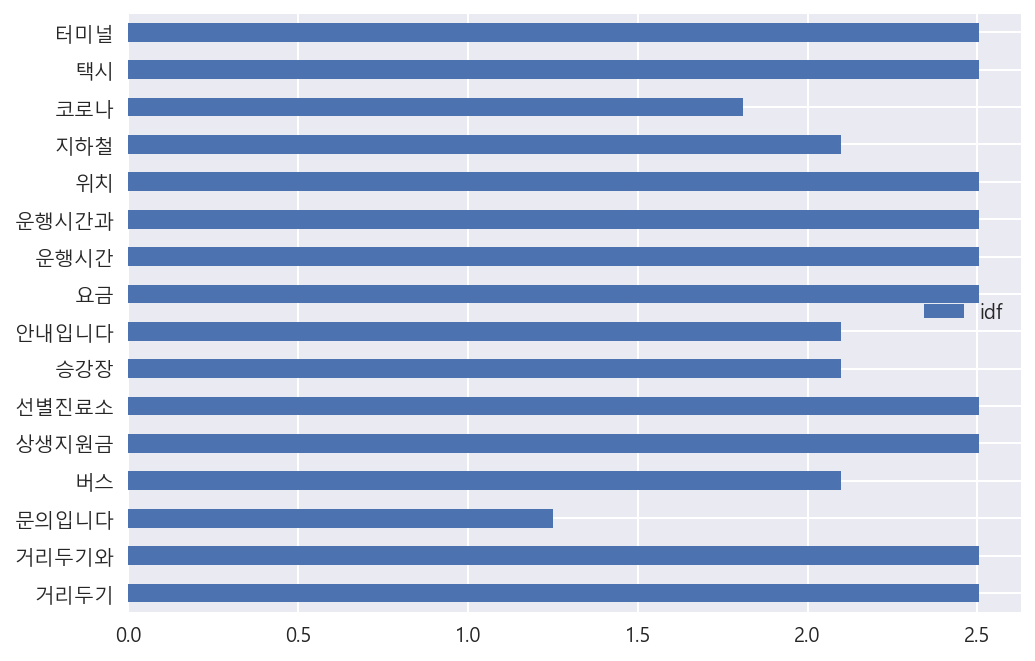

In [123]:
# idf_dict 값 시각화
pd.DataFrame(idf_dict.values(), idf_dict.keys(), columns=['idf']).plot.barh()

### TfidfVectorizer 의 다양한 기능 사용하기
* analyzer
* n-gram
* min_df, max_df
* max_features
* stop_words

In [ ]:
# analyzer='char_wb', ngram_range=(2, 3), max_df=1.0, min_df=1
